In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("df.csv")
print(df.head())

   Corporation ID                         Corp Name  Non-GCE Promote %  \
0              15   Adams Central Community Schools           0.017691   
1              25     North Adams Community Schools           0.042012   
2              35               South Adams Schools           0.004467   
3             125  MSD Southwest Allen County Schls           0.024144   
4             225    Northwest Allen County Schools           0.012208   

      ELL %  Special Education %    FRPM_%  Pct American Indian  Pct Asian  \
0  0.023529             0.152941  0.271324             0.000735   0.005147   
1  0.007600             0.179861  0.454718             0.002533   0.005066   
2  0.100153             0.188838  0.455657             0.001529   0.008410   
3  0.020649             0.119391  0.236400             0.002250   0.046195   
4  0.036025             0.157700  0.237743             0.001193   0.062865   

   Pct Black  Pct Hispanic  ...  Pct Pacific Islander  Pct White  \
0   0.005882      

In [4]:
X = ["Non-GCE Promote %", 
     "ELL %", 
     "Special Education %", 
     "FRPM_%",  
     "Chronically Absent Percent", 
     "AVG_ATT_RATE", 
     "Total Enrollment", 
     "Corp Per/Student", 
     "% Tested ELA", 
     "% Tested Math",
     "Pct American Indian",
     "Pct Asian",
     "Pct Black",
     "Pct Hispanic",
     "Pct Multiracial",
     "Pct Pacific Islander",
     "Pct White"]
Y = ["ELA Proficient %", "Math Proficient %"]
subset = df[X + Y]

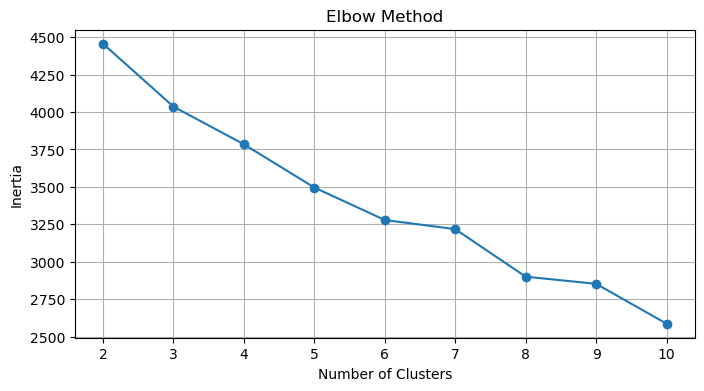

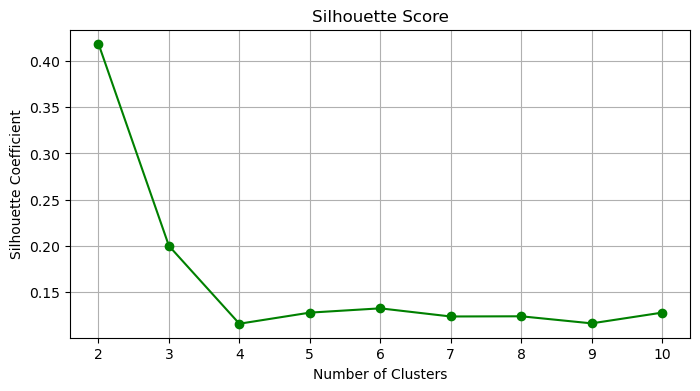

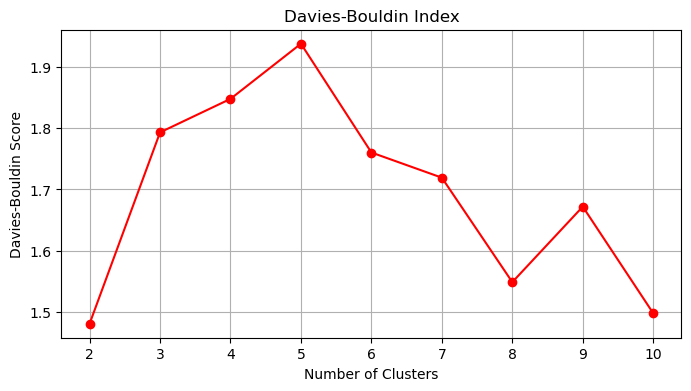

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Prepare and standardize the data
features = subset.values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize empty lists to store evaluation metrics
inertia = []
silhouette_scores = []
davies_scores = []

k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_features)
    
    inertia.append(kmeans.inertia_)  # for Elbow
    silhouette_scores.append(silhouette_score(scaled_features, labels))
    davies_scores.append(davies_bouldin_score(scaled_features, labels))

# Plot Elbow Method (Inertia)
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot Silhouette Coefficient
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Index
plt.figure(figsize=(8, 4))
plt.plot(k_values, davies_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

corp_ids = df["Corporation ID"]
corp_names = df["Corp Name"]

X = df.drop(columns=["Corporation ID", "Corp Name"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=7, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

cluster_profiles = df.groupby("Cluster").mean(numeric_only=True)
print(cluster_profiles.T)

Cluster                                0             1             2  \
Corporation ID               6420.909091   4858.611111   4031.730769   
Non-GCE Promote %               0.068839      0.032917      0.020484   
ELL %                           0.044996      0.104358      0.074984   
Special Education %             0.278696      0.173127      0.148466   
FRPM_%                          0.637081      0.506108      0.339587   
Pct American Indian             0.001432      0.001158      0.001802   
Pct Asian                       0.010089      0.009082      0.084702   
Pct Black                       0.187169      0.060107      0.084040   
Pct Hispanic                    0.118213      0.237143      0.107325   
Pct Multiracial                 0.112960      0.033791      0.058627   
Pct Pacific Islander            0.000857      0.000461      0.001293   
Pct White                       0.569240      0.658222      0.662191   
Chronically Absent Percent      0.221399      0.108083      0.08

In [37]:
cluster_profiles = df.groupby("Cluster").mean(numeric_only=True)
print(cluster_profiles.T)

Cluster                                A             B             C  \
Corporation ID               6420.909091   4858.611111   4031.730769   
Non-GCE Promote %               0.068839      0.032917      0.020484   
ELL %                           0.044996      0.104358      0.074984   
Special Education %             0.278696      0.173127      0.148466   
FRPM_%                          0.637081      0.506108      0.339587   
Pct American Indian             0.001432      0.001158      0.001802   
Pct Asian                       0.010089      0.009082      0.084702   
Pct Black                       0.187169      0.060107      0.084040   
Pct Hispanic                    0.118213      0.237143      0.107325   
Pct Multiracial                 0.112960      0.033791      0.058627   
Pct Pacific Islander            0.000857      0.000461      0.001293   
Pct White                       0.569240      0.658222      0.662191   
Chronically Absent Percent      0.221399      0.108083      0.08

In [7]:
df['Cluster'].value_counts().sort_index()

Cluster
0     22
1     18
2     26
3    105
4      5
5    102
6     28
Name: count, dtype: int64

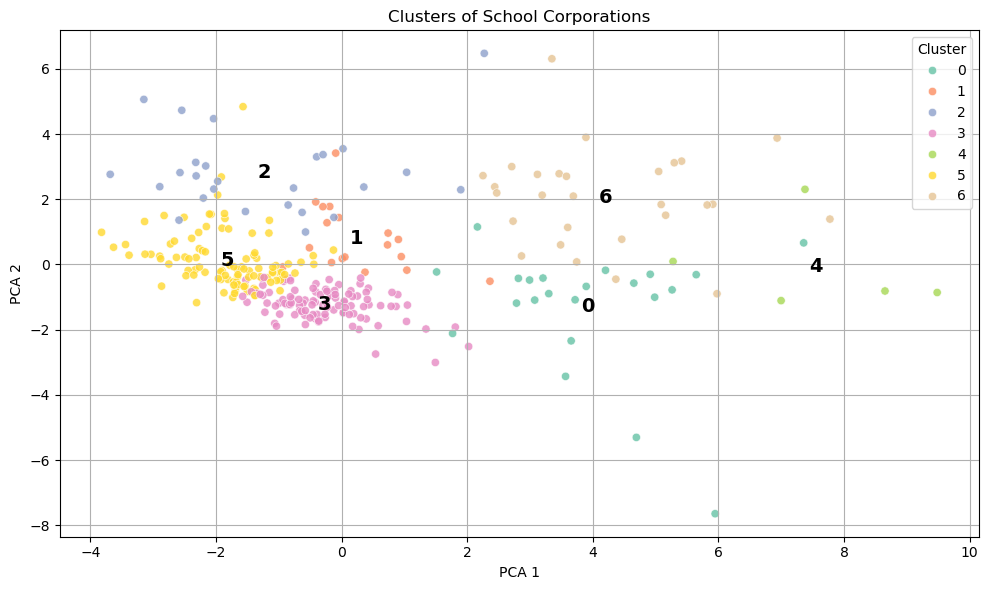

In [8]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

prelim_clusters = plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="Set2", alpha=0.8)

cluster_centers = df.groupby("Cluster")[["PCA1", "PCA2"]].mean()
for cluster, (x, y) in cluster_centers.iterrows():
    plt.text(x, y, str(cluster), fontsize=14, fontweight='bold', ha='center', va='center', color='black')

plt.title("Clusters of School Corporations")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
prelim_clusters.savefig("preliminary_clusters.png", dpi=300, bbox_inches='tight')

In [10]:
df = df.drop(columns=["PCA1", "PCA2"])

In [11]:
from sklearn.metrics import pairwise_distances_argmin_min

centers_scaled = kmeans.cluster_centers_
closest_indices, _ = pairwise_distances_argmin_min(centers_scaled, X_scaled)
closest_rows = df.iloc[closest_indices]
closest_rows[["Corporation ID", "Corp Name", "Cluster"] + list(X.columns)]

,Corporation ID,Corp Name,Cluster,Non-GCE Promote %,ELL %,Special Education %,FRPM_%,Pct American Indian,Pct Asian,Pct Black,...,Pct Pacific Islander,Pct White,Chronically Absent Percent,AVG_ATT_RATE,Total Enrollment,% Tested ELA,% Tested Math,Corp Per/Student,ELA Proficient %,Math Proficient %
160,5275,Anderson Community School Corp,0,0.068477,0.081484,0.203379,0.725406,0.000828,0.002153,0.213647,...,0.000166,0.482279,0.252161,0.910483,6038,0.438059,0.437893,12356.20,0.179962,0.173222
127,4415,Warsaw Community Schools,1,0.048810,0.094452,0.172393,0.496653,0.001190,0.014726,0.022460,...,0.000446,0.698200,0.115839,0.950511,6723,0.459021,0.458426,9630.31,0.436811,0.457820
118,4205,Center Grove Community School Corp,2,0.017485,0.045110,0.150920,0.262966,0.000935,0.090219,0.041784,...,0.001039,0.766656,0.060117,0.956662,9621,0.467103,0.466895,8926.53,0.584335,0.607302
202,6195,Spencer-Owen Community Schools,3,0.021519,0.009029,0.175621,0.567946,0.001806,0.005869,0.002257,...,0.000000,0.929571,0.143417,0.932882,2215,0.428894,0.428894,11243.76,0.381053,0.384211
292,9535,Gary Lighthouse Charter School,4,0.159420,0.032833,0.126642,1.000000,0.000000,0.000000,0.893058,...,0.000000,0.005629,0.308826,0.889273,1066,0.416510,0.417448,14595.29,0.126126,0.094382
78,3025,Hamilton Heights School Corp,5,0.019285,0.011986,0.155822,0.355736,0.001284,0.001284,0.005993,...,0.000000,0.921661,0.087315,0.948150,2336,0.446490,0.445634,9482.47,0.484180,0.461095
52,2270,Concord Community Schools,6,0.048455,0.296331,0.126135,0.631051,0.000756,0.008510,0.079803,...,0.000567,0.375756,0.176613,0.937666,5288,0.447995,0.447428,9920.97,0.324610,0.320795


In [12]:
outlier_schools = df[df["Cluster"] == 4]
print(outlier_schools)

     Corporation ID                          Corp Name  Non-GCE Promote %  \
142            4690         Gary Community School Corp           0.194760   
291            9460     Thea Bowman Leadership Academy           0.036654   
292            9535     Gary Lighthouse Charter School           0.159420   
293            9545   21st Century Charter Sch of Gary           0.079610   
302            9895  IN Math & Science Academy - North           0.130769   

        ELL %  Special Education %    FRPM_%  Pct American Indian  Pct Asian  \
142  0.010435             0.171925  0.622609             0.001242   0.000248   
291  0.012956             0.060071  0.740872             0.000000   0.000000   
292  0.032833             0.126642  1.000000             0.000000   0.000000   
293  0.003298             0.107172  0.788129             0.000000   0.000000   
302  0.271667             0.076667  0.850000             0.001667   0.006667   

     Pct Black  Pct Hispanic  ...  Pct White  Chronicall

Evaluating sub-clusters for Cluster 0


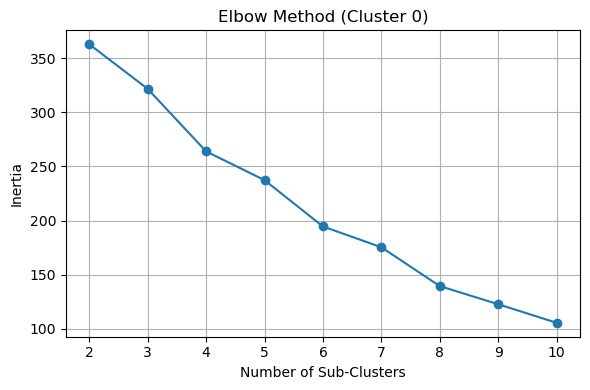

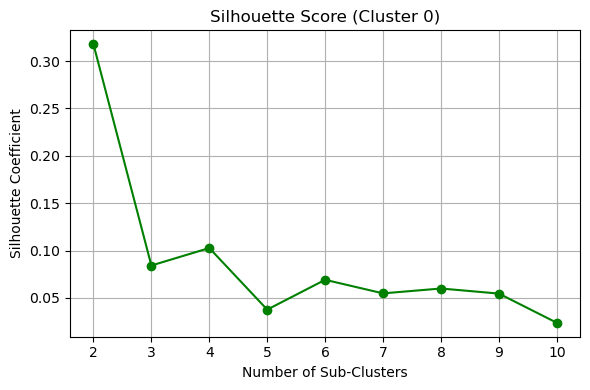

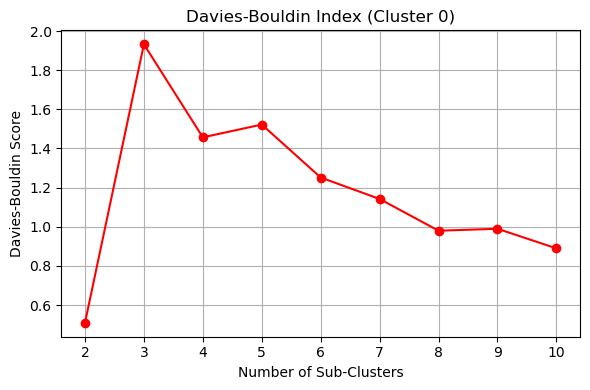

Evaluating sub-clusters for Cluster 1


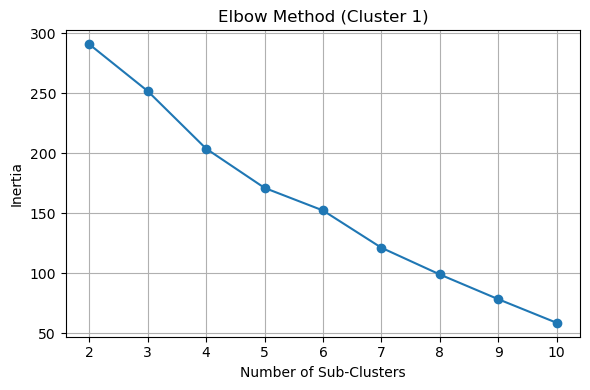

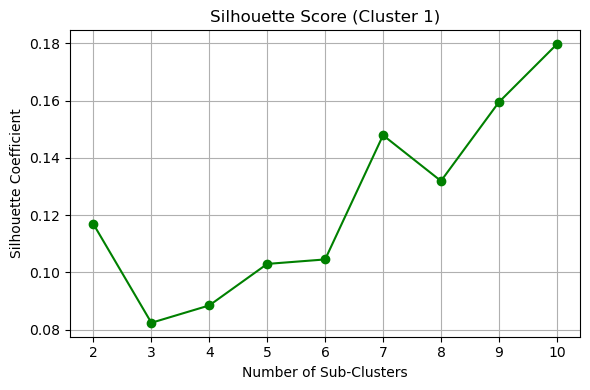

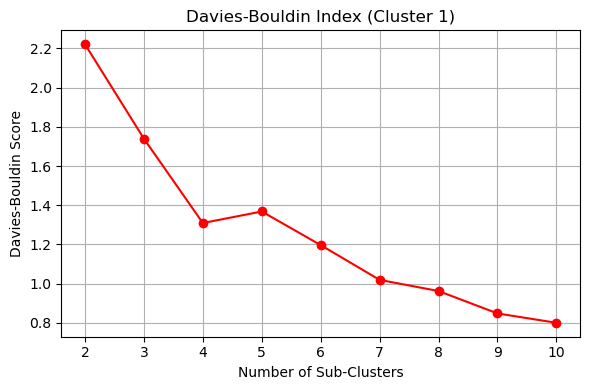

Evaluating sub-clusters for Cluster 2


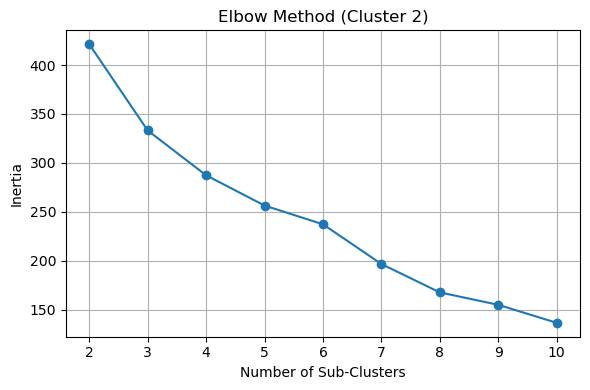

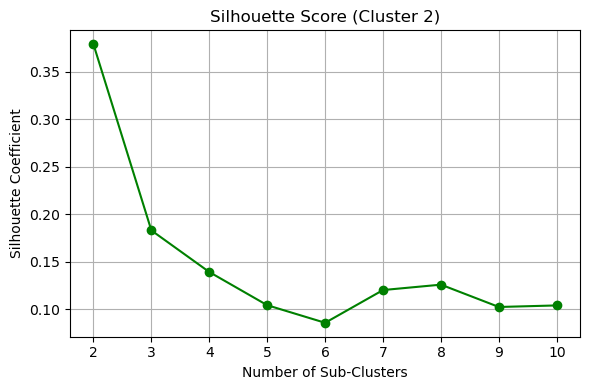

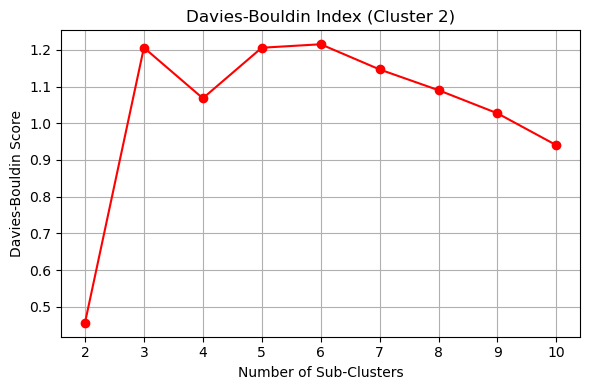

Evaluating sub-clusters for Cluster 3


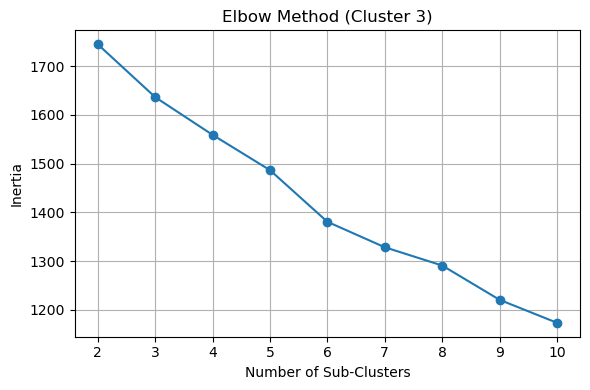

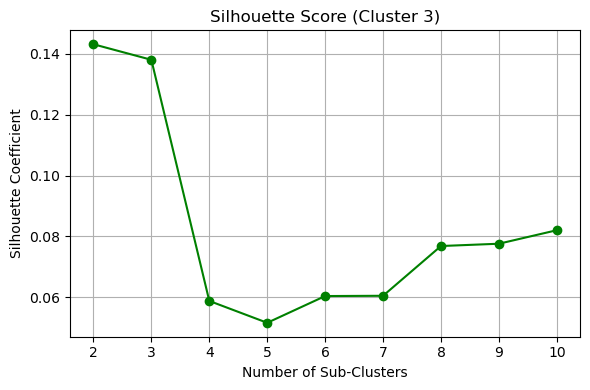

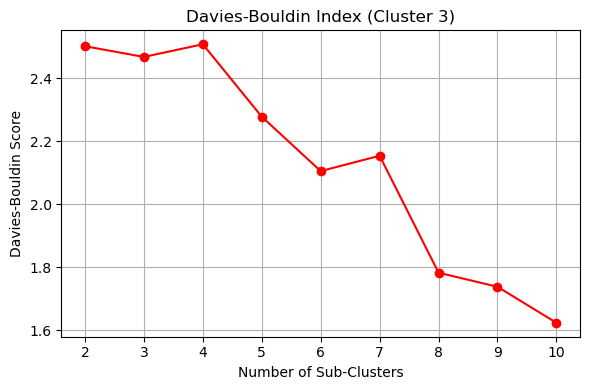

Evaluating sub-clusters for Cluster 4
  Skipping Cluster 4 (not enough data: 5 rows).
Evaluating sub-clusters for Cluster 5


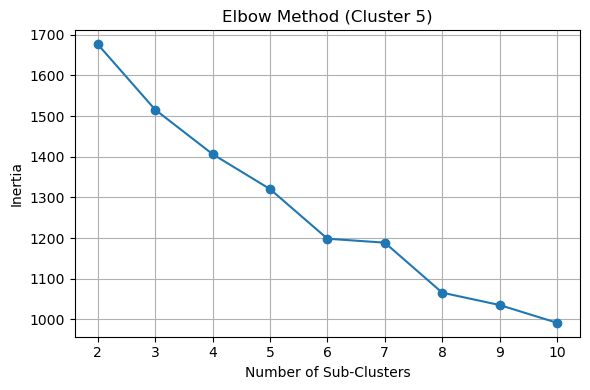

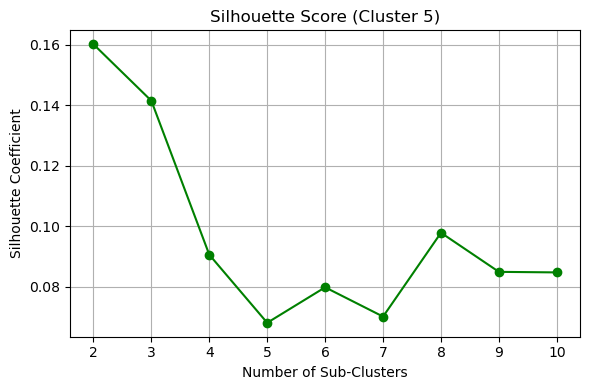

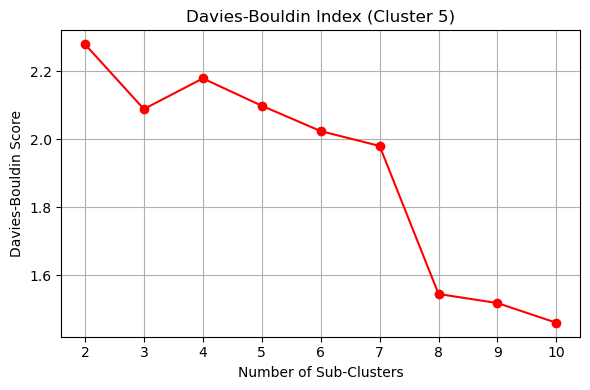

Evaluating sub-clusters for Cluster 6


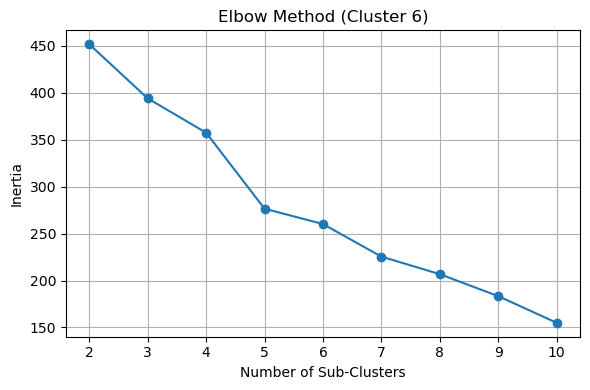

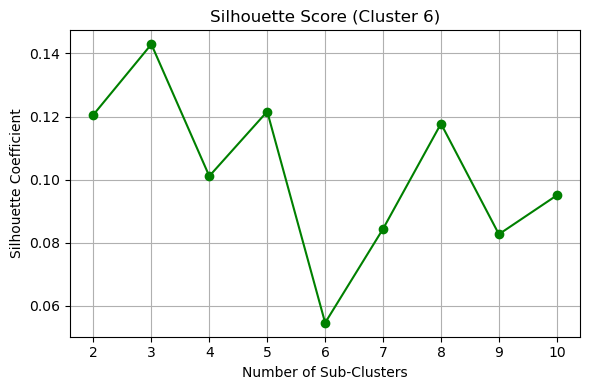

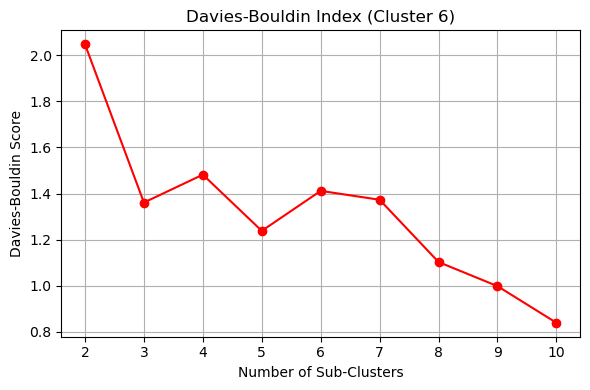

In [15]:
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore", category=UserWarning)

features_list = [
    "Non-GCE Promote %", 
    "ELL %", 
    "Special Education %", 
    "FRPM_%", 
    "Chronically Absent Percent", 
    "AVG_ATT_RATE", 
    "Total Enrollment", 
    "Corp Per/Student", 
    "% Tested ELA", 
    "% Tested Math",
    "Pct American Indian",
    "Pct Asian",
    "Pct Black",
    "Pct Hispanic",
    "Pct Multiracial",
    "Pct Pacific Islander",
    "Pct White",
    "ELA Proficient %", 
    "Math Proficient %"
]

k_values = range(2, 11)

for cluster_num in sorted(df['Cluster'].unique()):
    print(f"Evaluating sub-clusters for Cluster {cluster_num}")
    
    cluster_df = df[df['Cluster'] == cluster_num][features_list].dropna()
    n_samples = len(cluster_df)
    
    if n_samples < 6:
        print(f"  Skipping Cluster {cluster_num} (not enough data: {n_samples} rows).")
        continue

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(cluster_df)

    inertia = []
    silhouette_scores = []
    davies_scores = []

    for k in k_values:
        if n_samples < k:
            # Skip values of k that are too large for the cluster size
            inertia.append(float('nan'))
            silhouette_scores.append(float('nan'))
            davies_scores.append(float('nan'))
            continue

        try:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(scaled_features)
            inertia.append(kmeans.inertia_)

            if len(set(labels)) > 1:
                silhouette_scores.append(silhouette_score(scaled_features, labels))
                davies_scores.append(davies_bouldin_score(scaled_features, labels))
            else:
                silhouette_scores.append(float('nan'))
                davies_scores.append(float('nan'))

        except ValueError as e:
            print(f"  Skipping k={k} for Cluster {cluster_num} due to error: {e}")
            inertia.append(float('nan'))
            silhouette_scores.append(float('nan'))
            davies_scores.append(float('nan'))

    # Plot Elbow Method
    plt.figure(figsize=(6, 4))
    plt.plot(k_values, inertia, marker='o')
    plt.title(f'Elbow Method (Cluster {cluster_num})')
    plt.xlabel('Number of Sub-Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Silhouette Score
    plt.figure(figsize=(6, 4))
    plt.plot(k_values, silhouette_scores, marker='o', color='green')
    plt.title(f'Silhouette Score (Cluster {cluster_num})')
    plt.xlabel('Number of Sub-Clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Davies-Bouldin Score
    plt.figure(figsize=(6, 4))
    plt.plot(k_values, davies_scores, marker='o', color='red')
    plt.title(f'Davies-Bouldin Index (Cluster {cluster_num})')
    plt.xlabel('Number of Sub-Clusters')
    plt.ylabel('Davies-Bouldin Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
subcluster_counts = {
    0: 2,
    1: 7,
    2: 3,
    3: 10,
    4: 1,
    5: 8,
    6: 5
}

In [17]:
# Initialize sub_cluster column
df["sub_cluster"] = -1

# Subcluster inside each main cluster using KMeans
for cluster_label, n_subclusters in subcluster_counts.items():
    cluster_df = df[df["Cluster"] == cluster_label]

    # Drop non-feature columns
    cluster_features = cluster_df.drop(columns=["Corporation ID", "Corp Name", "Cluster", "sub_cluster"], errors='ignore')

    # If too few samples, skip
    if len(cluster_features) < n_subclusters:
        print(f"Skipping Cluster {cluster_label} — too few samples for {n_subclusters} subclusters")
        continue

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(cluster_features)

    kmeans_sub = KMeans(n_clusters=n_subclusters, random_state=42, n_init='auto')
    sub_labels = kmeans_sub.fit_predict(scaled_features)

    df.loc[cluster_df.index, "sub_cluster"] = sub_labels

subcluster_profiles = df.groupby(["Cluster", "sub_cluster"]).mean(numeric_only=True)
print(subcluster_profiles.T)

Cluster                               0                          1  \
sub_cluster                           0             1            0   
Corporation ID              6254.285714   9920.000000  4700.000000   
Non-GCE Promote %              0.072117      0.000000     0.022674   
ELL %                          0.046873      0.005587     0.027041   
Special Education %            0.253659      0.804469     0.153230   
FRPM_%                         0.619800      1.000000     0.522784   
Pct American Indian            0.001500      0.000000     0.000501   
Pct Asian                      0.010570      0.000000     0.004006   
Pct Black                      0.184909      0.234637     0.224837   
Pct Hispanic                   0.121181      0.055866     0.304457   
Pct Multiracial                0.114615      0.078212     0.047071   
Pct Pacific Islander           0.000897      0.000000     0.000501   
Pct White                      0.566286      0.631285     0.418628   
Chronically Absent P

In [34]:
subcluster_profiles = df.groupby(["Cluster", "sub_cluster"]).mean(numeric_only=True)
print(subcluster_profiles.T)

Cluster                               A                          B  \
sub_cluster                           0             1            0   
Corporation ID              6254.285714   9920.000000  4700.000000   
Non-GCE Promote %              0.072117      0.000000     0.022674   
ELL %                          0.046873      0.005587     0.027041   
Special Education %            0.253659      0.804469     0.153230   
FRPM_%                         0.619800      1.000000     0.522784   
Pct American Indian            0.001500      0.000000     0.000501   
Pct Asian                      0.010570      0.000000     0.004006   
Pct Black                      0.184909      0.234637     0.224837   
Pct Hispanic                   0.121181      0.055866     0.304457   
Pct Multiracial                0.114615      0.078212     0.047071   
Pct Pacific Islander           0.000897      0.000000     0.000501   
Pct White                      0.566286      0.631285     0.418628   
Chronically Absent P

In [18]:
df.groupby(['Cluster', 'sub_cluster']).size().unstack(fill_value=0)

sub_cluster,0,1,2,3,4,5,6,7,8,9
Cluster,,,,,,,,,,
0,21,1,0,0,0,0,0,0,0,0
1,1,4,3,1,3,4,2,0,0,0
2,19,1,6,0,0,0,0,0,0,0
3,5,24,15,19,2,10,2,1,26,1
4,5,0,0,0,0,0,0,0,0,0
5,9,12,10,23,12,34,1,1,0,0
6,1,4,12,10,1,0,0,0,0,0


In [19]:
print(df)

     Corporation ID                           Corp Name  Non-GCE Promote %  \
0                15     Adams Central Community Schools           0.017691   
1                25       North Adams Community Schools           0.042012   
2                35                 South Adams Schools           0.004467   
3               125    MSD Southwest Allen County Schls           0.024144   
4               225      Northwest Allen County Schools           0.012208   
..              ...                                 ...                ...   
301            9875        Rock Creek Community Academy           0.017448   
302            9895   IN Math & Science Academy - North           0.130769   
303            9905         Indiana Connections Academy           0.065043   
304            9920               Damar Charter Academy           0.000000   
305            9950  Dugger Union Community School Corp           0.075298   

        ELL %  Special Education %    FRPM_%  Pct American Indi

In [50]:
cluster_codes = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G'
}

In [53]:
print(df)

     Corporation ID                           Corp Name  Non-GCE Promote %  \
0                15     Adams Central Community Schools           0.017691   
1                25       North Adams Community Schools           0.042012   
2                35                 South Adams Schools           0.004467   
3               125    MSD Southwest Allen County Schls           0.024144   
4               225      Northwest Allen County Schools           0.012208   
..              ...                                 ...                ...   
301            9875        Rock Creek Community Academy           0.017448   
302            9895   IN Math & Science Academy - North           0.130769   
303            9905         Indiana Connections Academy           0.065043   
304            9920               Damar Charter Academy           0.000000   
305            9950  Dugger Union Community School Corp           0.075298   

        ELL %  Special Education %    FRPM_%  Pct American Indi

In [54]:
df.to_csv("clustered_df.csv", index=False)

In [36]:
subcluster_profiles_T = subcluster_profiles.T
subcluster_profiles_T.to_csv("subcluster_profiles.csv", index=True)

In [41]:
from scipy.stats import percentileofscore

subcluster_percentiles = subcluster_profiles.copy()

for col in subcluster_profiles.columns:
    # For each cluster's mean, calculate the percentile rank within the original data
    subcluster_percentiles[col] = subcluster_profiles[col].apply(
        lambda x: percentileofscore(df[col], x, kind='rank')
    )
    
print(subcluster_percentiles)

                     Corporation ID  Non-GCE Promote %       ELL %  \
Cluster sub_cluster                                                  
A       0                 66.339869          91.176471   73.202614   
        1                 99.673203           0.653595   20.588235   
B       0                 47.058824          50.653595   60.457516   
        1                 42.156863          77.124183   87.581699   
        2                 41.503268          51.633987   92.156863   
        3                 56.535948          11.764706   96.405229   
        4                 43.790850          78.104575   78.104575   
        5                 51.307190          75.163399   73.529412   
        6                 65.686275          33.986928   82.679739   
C       0                 37.254902          32.679739   73.856209   
        1                 85.947712          91.176471   74.183007   
        2                 34.640523          62.091503   90.849673   
D       0           

In [42]:
subcluster_percentiles_T = subcluster_percentiles.T
subcluster_percentiles_T.to_csv("subcluster_percentiles.csv", index=True)

In [38]:
cluster_profiles_T = cluster_profiles.T
cluster_profiles_T.to_csv("cluster_profiles.csv", index=True)

In [39]:
from scipy.stats import percentileofscore

cluster_percentiles = cluster_profiles.copy()

for col in cluster_profiles.columns:
    # For each cluster's mean, calculate the percentile rank within the original data
    cluster_percentiles[col] = cluster_profiles[col].apply(
        lambda x: percentileofscore(df[col], x, kind='rank')
    )
    
print(cluster_percentiles)

         Corporation ID  Non-GCE Promote %      ELL %  Special Education %  \
Cluster                                                                      
A             67.973856          90.522876  72.222222            97.712418   
B             49.019608          66.013072  86.601307            51.633987   
C             38.235294          44.771242  82.026144            22.549020   
D             50.653595          63.071895  42.483660            71.895425   
F             93.790850          98.039216  78.758170             3.921569   
G             43.464052          33.986928  54.248366            45.098039   
H             50.653595          86.928105  93.790850            19.934641   

            FRPM_%  Pct American Indian  Pct Asian  Pct Black  Pct Hispanic  \
Cluster                                                                       
A        86.928105            51.307190  78.104575  88.888889     74.509804   
B        51.960784            44.117647  74.836601  75.81699

In [40]:
cluster_percentiles_T = cluster_percentiles.T
cluster_percentiles_T.to_csv("cluster_percentiles.csv", index=True)